<a href="https://colab.research.google.com/github/joshIsac/sem-2-lab-/blob/main/2348523_lab_3_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [62]:
data=pd.read_csv('/content/drive/MyDrive/Program_3a_Dataset.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [63]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [65]:
data.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [66]:
df=pd.DataFrame(data)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
df.shape

(41188, 21)

In [68]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
label = le.fit_transform(df['y'])
label

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
df.drop("y", axis=1, inplace=True)
df["y"] = label
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41184,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41185,34,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [70]:
X=df[['duration','age','campaign']]
y=df['y']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [72]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

In [73]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
train_pred=log_reg.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 1, 0])

In [75]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy for testing (in %):", acc*100)

Logistic Regression model accuracy for testing (in %): 89.4634620053411


In [81]:
acc = accuracy_score(y_train, train_pred)
print("Logistic Regression model accuracy for testing (in %):", acc*100)

Logistic Regression model accuracy for testing (in %): 89.27543269397523


In [82]:
from sklearn.metrics import confusion_matrix ,classification_report
import seaborn as sn
cnf=confusion_matrix(y_test,y_pred)
cnf


array([[10807,   170],
       [ 1132,   248]])

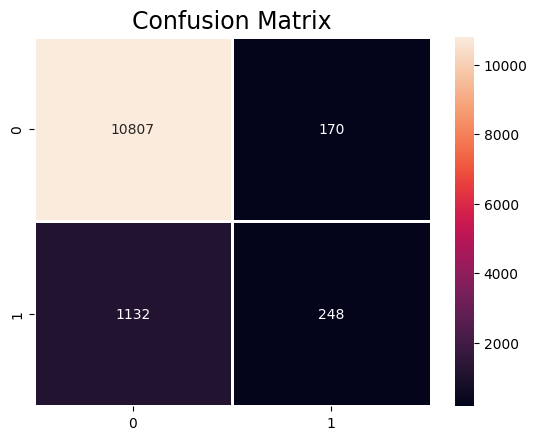

In [83]:
sn.heatmap(cnf, annot=True, fmt='d',linewidths=2)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [84]:
print("Classification report")
print(classification_report(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10977
           1       0.59      0.18      0.28      1380

    accuracy                           0.89     12357
   macro avg       0.75      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



Precision for class 0 (the first class) is 91%, indicating that among the instances predicted as class 0, 91% are truly class 0.
Precision for class 1 (the second class) is 59%, suggesting that among the instances predicted as class 1, only 59% are truly class 1.

Recall for class 0 is 98%, indicating that the classifier correctly identifies 98% of all actual instances of class 0.
Recall for class 1 is 18%, suggesting that the classifier captures only 18% of all actual instances of class 1.

F1-Score for class 0 is 94%.
F1-Score for class 1 is 28%.

There are 10,977 instances of class 0 and 1,380 instances of class 1 in the dataset.

 The macro average precision, recall, and F1-Score are 75%, 58%, and 61%, respectively.
Weighted Avg:

 This is particularly useful when classes are imbalanced. The weighted average precision, recall, and F1-Score are 87%, 89%, and 87%, respectively.

